In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline
import pickle

In [2]:
df_hhs = pd.read_csv('https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD', parse_dates = ['date'])

https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u

https://healthdata.gov/api/views/g62h-syeh/rows.csv?accessType=DOWNLOAD

In [3]:
df_hhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36839 entries, 0 to 36838
Columns: 117 entries, state to total_patients_hospitalized_confirmed_influenza_coverage
dtypes: datetime64[ns](1), float64(68), int64(47), object(1)
memory usage: 32.9+ MB


for x in df_hhs.columns:
    print(x)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df_hhs.head()

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,inpatient_beds,inpatient_beds_coverage,inpatient_beds_used,inpatient_beds_used_coverage,inpatient_beds_used_covid,inpatient_beds_used_covid_coverage,previous_day_admission_adult_covid_confirmed,previous_day_admission_adult_covid_confirmed_coverage,previous_day_admission_adult_covid_suspected,previous_day_admission_adult_covid_suspected_coverage,previous_day_admission_pediatric_covid_confirmed,previous_day_admission_pediatric_covid_confirmed_coverage,previous_day_admission_pediatric_covid_suspected,previous_day_admission_pediatric_covid_suspected_coverage,staffed_adult_icu_bed_occupancy,staffed_adult_icu_bed_occupancy_coverage,staffed_icu_adult_patients_confirmed_and_suspected_covid,staffed_icu_adult_patients_confirmed_and_suspected_covid_coverage,staffed_icu_adult_patients_confirmed_covid,staffed_icu_adult_patients_confirmed_covid_coverage,total_adult_patients_hospitalized_confirmed_and_suspected_covid,total_adult_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_adult_patients_hospitalized_confirmed_covid,total_adult_patients_hospitalized_confirmed_covid_coverage,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_coverage,total_pediatric_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid_coverage,total_staffed_adult_icu_beds,total_staffed_adult_icu_beds_coverage,inpatient_beds_utilization,inpatient_beds_utilization_coverage,inpatient_beds_utilization_numerator,inpatient_beds_utilization_denominator,percent_of_inpatients_with_covid,percent_of_inpatients_with_covid_coverage,percent_of_inpatients_with_covid_numerator,percent_of_inpatients_with_covid_denominator,inpatient_bed_covid_utilization,inpatient_bed_covid_utilization_coverage,inpatient_bed_covid_utilization_numerator,inpatient_bed_covid_utilization_denominator,adult_icu_bed_covid_utilization,adult_icu_bed_covid_utilization_coverage,adult_icu_bed_covid_utilization_numerator,adult_icu_bed_covid_utilization_denominator,adult_icu_bed_utilization,adult_icu_bed_utilization_coverage,adult_icu_bed_utilization_numerator,adult_icu_bed_utilization_denominator,geocoded_state,previous_day_admission_adult_covid_confirmed_18-19,previous_day_admission_adult_covid_confirmed_18-19_coverage,previous_day_admission_adult_covid_confirmed_20-29,previous_day_admission_adult_covid_confirmed_20-29_coverage,previous_day_admission_adult_covid_confirmed_30-39,previous_day_admission_adult_covid_confirmed_30-39_coverage,previous_day_admission_adult_covid_confirmed_40-49,previous_day_admission_adult_covid_confirmed_40-49_coverage,previous_day_admission_adult_covid_confirmed_50-59,previous_day_admission_adult_covid_confirmed_50-59_coverage,previous_day_admission_adult_covid_confirmed_60-69,previous_day_admission_adult_covid_confirmed_60-69_coverage,previous_day_admission_adult_covid_confirmed_70-79,previous_day_admission_adult_covid_confirmed_70-79_coverage,previous_day_admission_adult_covid_confirmed_80+,previous_day_admission_adult_covid_confirmed_80+_coverage,previous_day_admission_adult_covid_confirmed_unknown,previous_day_admission_adult_covid_confirmed_unknown_coverage,previous_day_admission_adult_covid_suspected_18-19,previous_day_admission_adult_covid_suspected_18-19_coverage,previous_day_admission_adult_covid_suspected_20-29,previous_day_admission_adult_covid_suspected_20-29_coverage,previous_day_admission_adult_covid_suspected_30-39,previous_day_admission_adult_covid_suspected_30-39_coverage,previous_day_admission_adult_covid_suspected_40-49,previous_day_admission_adult_covid_suspected_40-49_coverage,previ

In [6]:
df_hhs.max()

state                                                                                            WY
date                                                                            2022-01-17 00:00:00
critical_staffing_shortage_today_yes                                                            191
critical_staffing_shortage_today_no                                                             495
critical_staffing_shortage_today_not_reported                                                   512
critical_staffing_shortage_anticipated_within_week_yes                                          204
critical_staffing_shortage_anticipated_within_week_no                                           470
critical_staffing_shortage_anticipated_within_week_not_reported                                 512
hospital_onset_covid                                                                         1334.0
hospital_onset_covid_coverage                                                                   597


In [7]:
date_list = df_hhs.date.unique()

In [8]:
date_list.sort()

date_list

In [9]:
aaa = []
for x in date_list:
    #print(df_hhs[df_hhs.date == x]['critical_staffing_shortage_today_yes'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['critical_staffing_shortage_today_yes'].sum()))

In [10]:
df_total_critical = pd.DataFrame(aaa, columns=['date','reported_critical_sum'])

In [11]:
bbb = df_total_critical[-500::]
ccc = bbb.set_index('date')
ccc_moving = ccc.rolling(7).mean().shift()

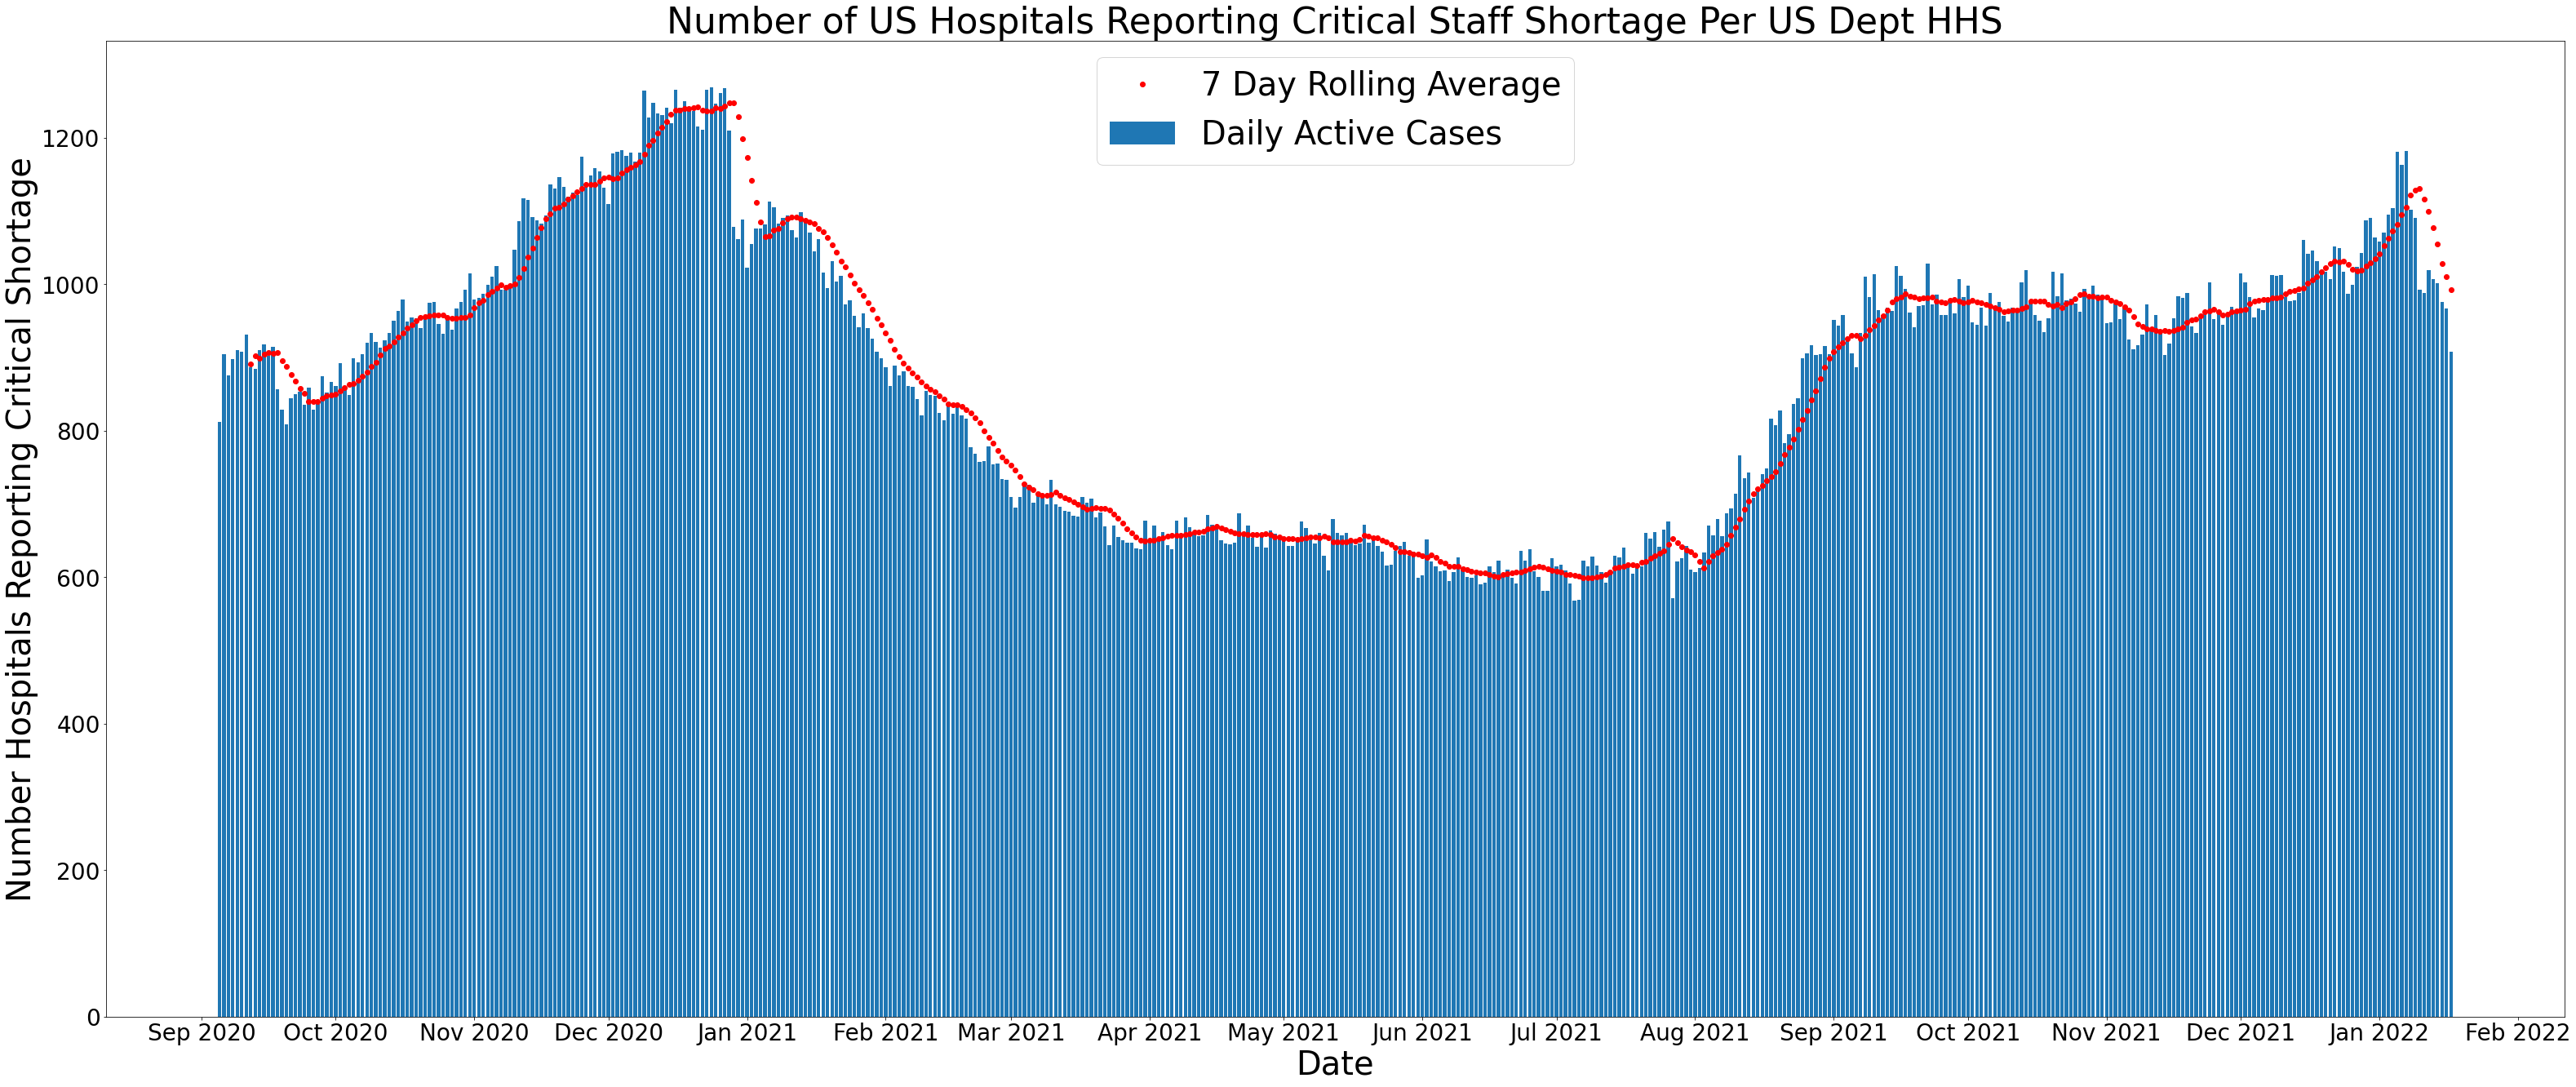

In [12]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Number of US Hospitals Reporting Critical Staff Shortage Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Number Hospitals Reporting Critical Shortage',color='black', fontsize = 40)
plt.bar(ccc.index, bbb.reported_critical_sum)
plt.plot(ccc_moving.reported_critical_sum, 'ro')
plt.legend(['7 Day Rolling Average','Daily Active Cases'], fontsize = 40)
#plt.legend(['7 Day Rolling Average','Daily Reported Critical Shortage'])
fig.savefig('HHS_critical_staffing_shortage_today.png')

for x in date_list:
    print(df_hhs[df_hhs.date == x]['deaths_covid'].sum())

In [13]:
aaa = []
for x in date_list:
    #print(df_hhs[df_hhs.date == x]['deaths_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['deaths_covid'].sum()))

In [14]:
ccc.tail()

,reported_critical_sum
date,
2022-01-13,1007
2022-01-14,1001
2022-01-15,976
2022-01-16,967
2022-01-17,908


In [15]:
df_deaths_covid = pd.DataFrame(aaa,columns=['date', 'deaths_covid'])

In [16]:
df_deaths_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          748 non-null    datetime64[ns]
 1   deaths_covid  748 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.8 KB


In [17]:
ccc = df_deaths_covid.set_index('date')[-500::]
ccc_rolling = ccc.rolling(7).mean().shift()

In [18]:
ccc.tail()

,deaths_covid
date,
2022-01-13,1520.0
2022-01-14,1534.0
2022-01-15,1448.0
2022-01-16,1495.0
2022-01-17,1468.0


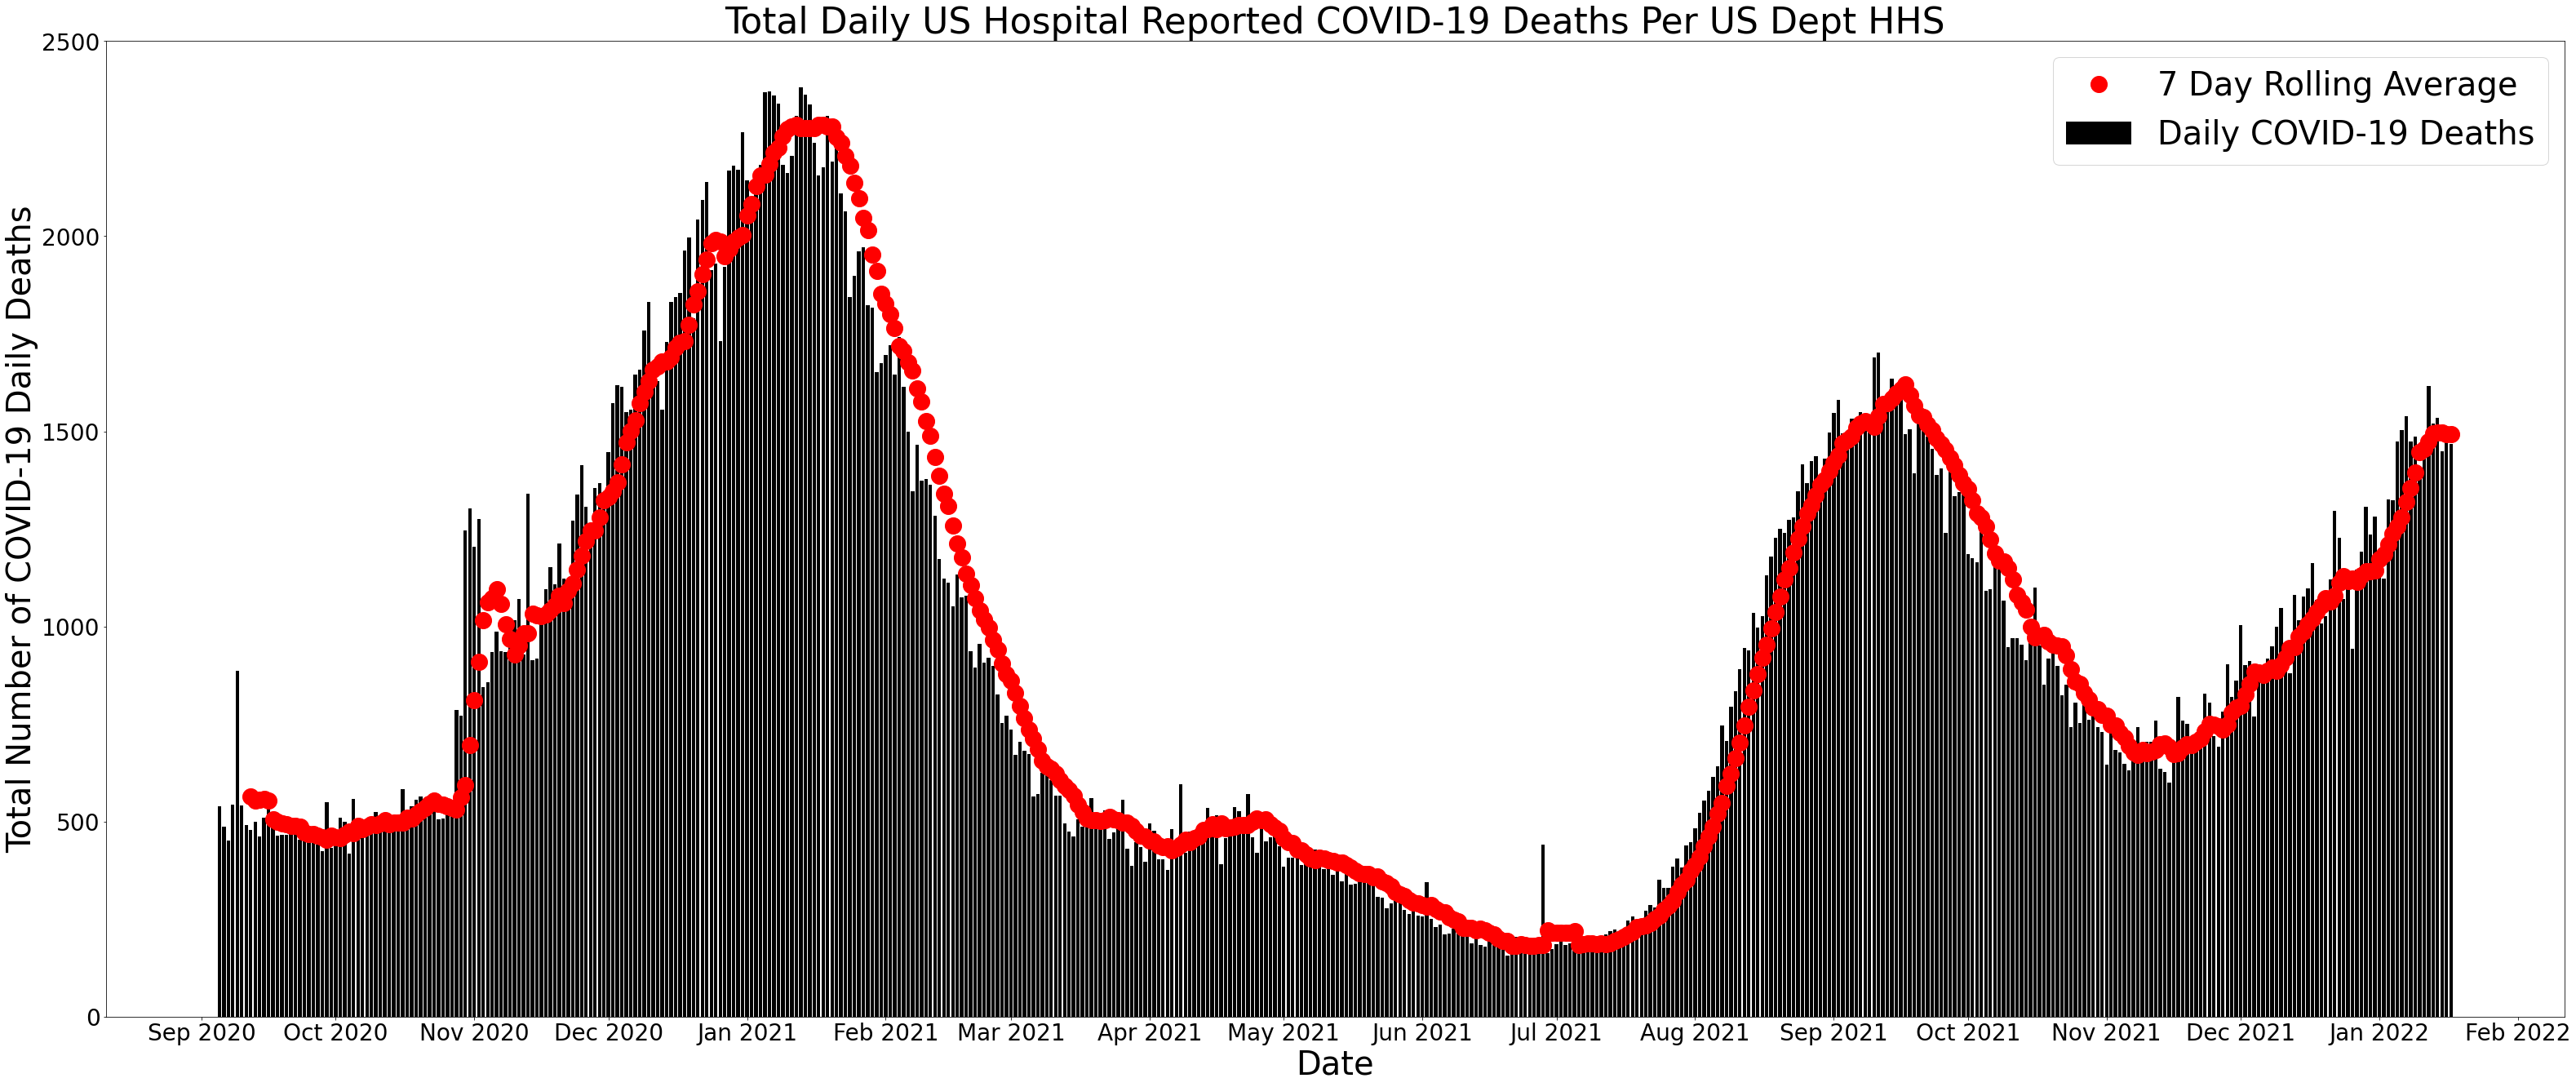

In [19]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Total Daily US Hospital Reported COVID-19 Deaths Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Total Number of COVID-19 Daily Deaths',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.deaths_covid, color = 'black')
plt.plot(ccc_rolling.deaths_covid, 'ro',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths'], fontsize = 40)
#plt.legend(['7 Day Rolling Average','Daily Reported Deaths'])
fig.savefig('HHS_hospital_deaths.png')

In [20]:
aaa = []
for x in date_list:
   # print(df_hhs[df_hhs.date == x]['hospital_onset_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['hospital_onset_covid'].sum()))
df_hospital_onset_covid = pd.DataFrame(aaa,columns=['date', 'hospital_onset_covid'])

In [21]:
ccc = df_hospital_onset_covid.set_index('date')[-400::]
ccc_rolling = ccc.rolling(7).mean().shift()
ccc.tail()

,hospital_onset_covid
date,
2022-01-13,4579.0
2022-01-14,4626.0
2022-01-15,4548.0
2022-01-16,4508.0
2022-01-17,3662.0


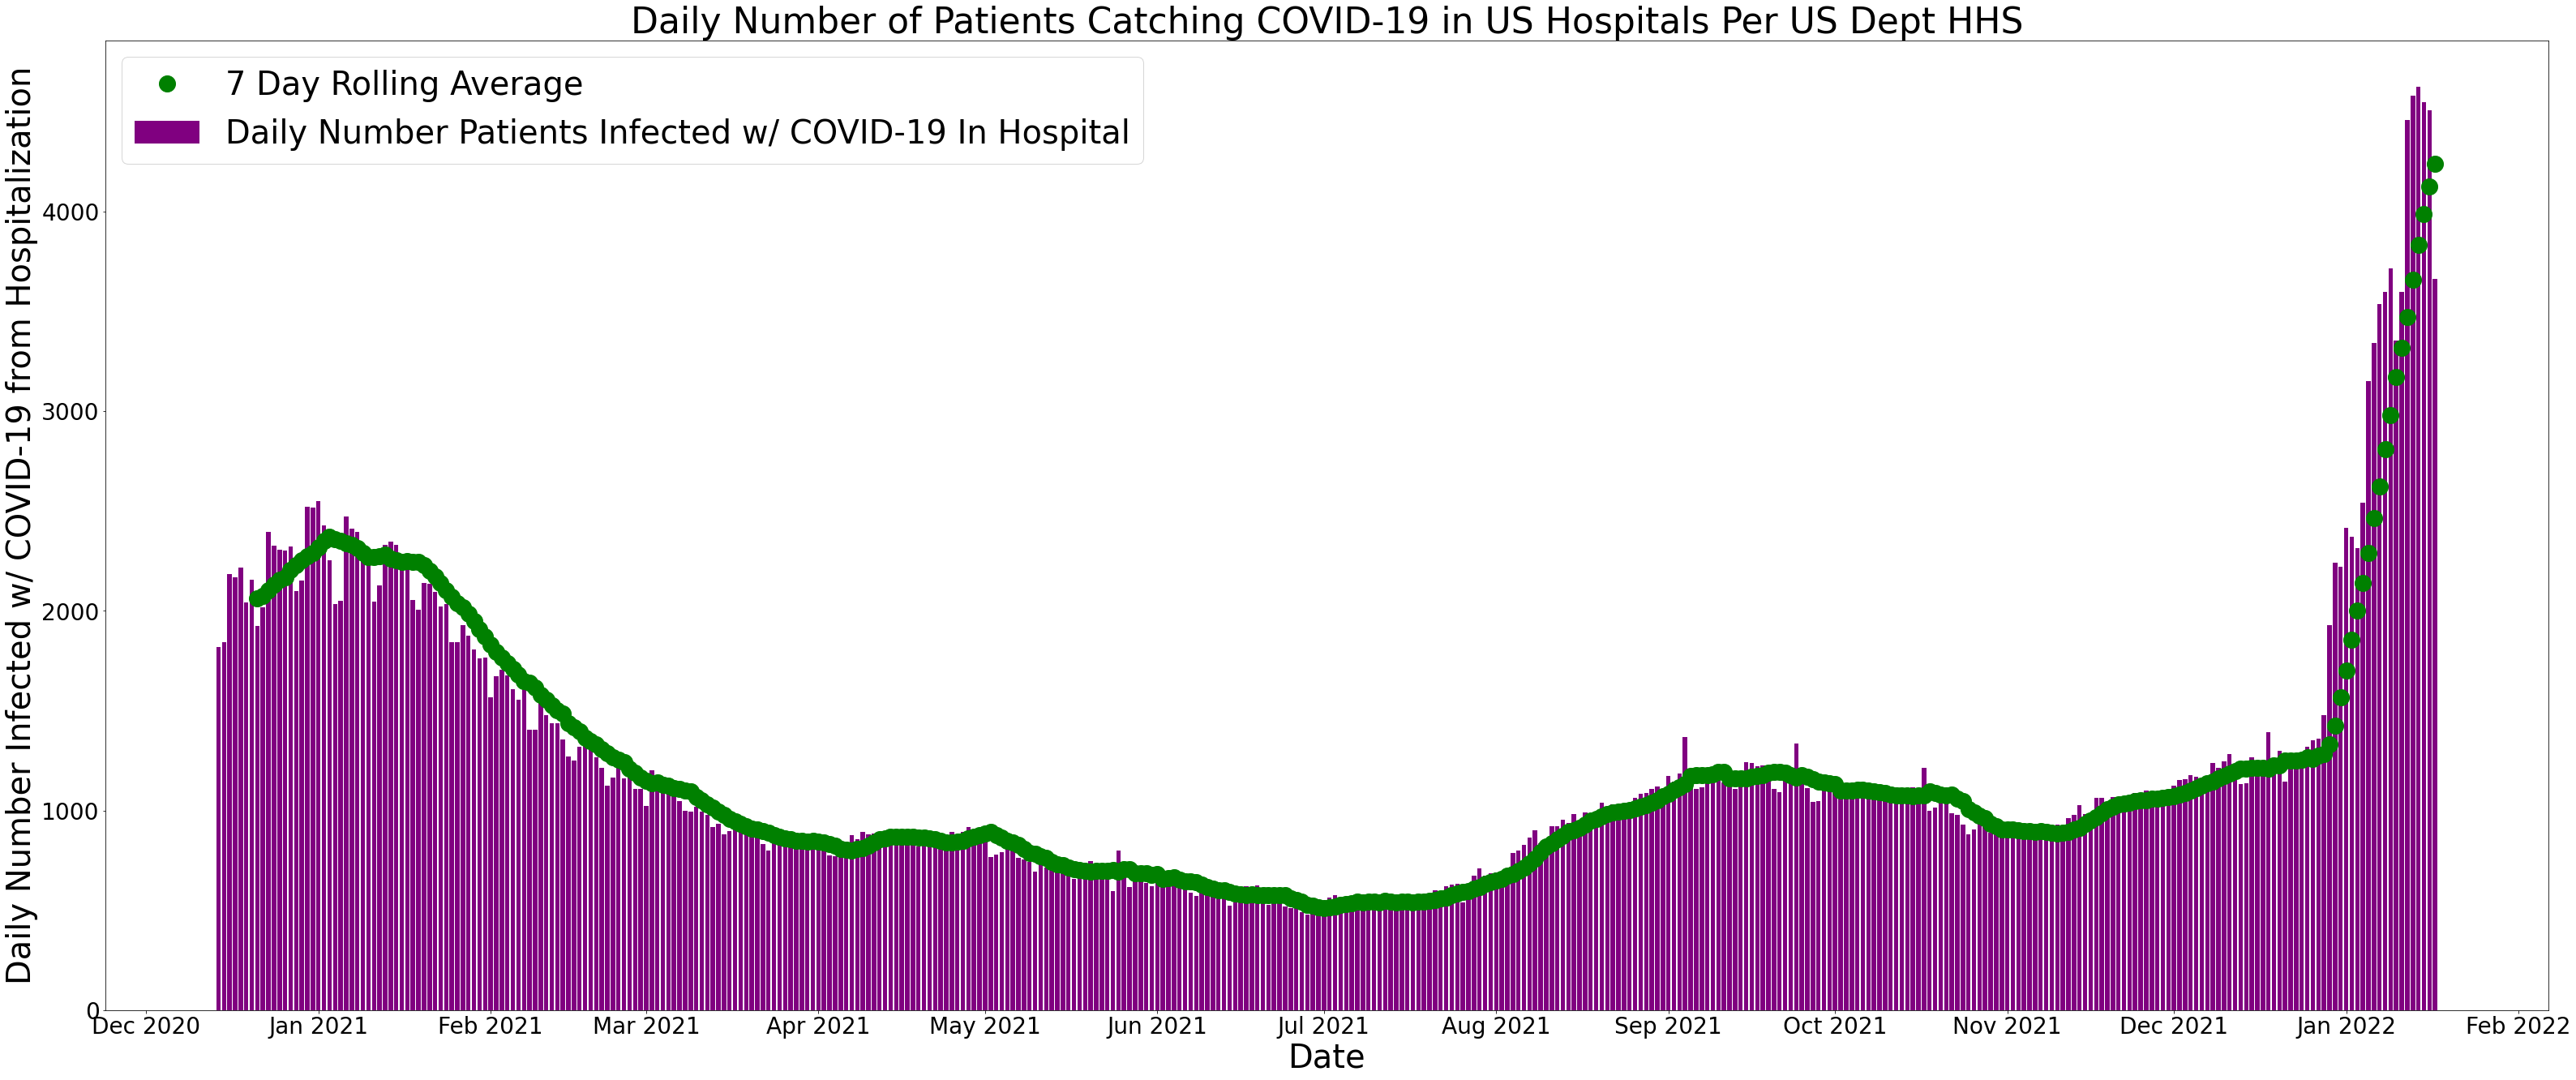

In [22]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily Number of Patients Catching COVID-19 in US Hospitals Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Daily Number Infected w/ COVID-19 from Hospitalization',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.hospital_onset_covid, color = 'purple')
plt.plot(ccc_rolling.hospital_onset_covid, 'go',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily Number Patients Infected w/ COVID-19 In Hospital'], fontsize = 40)
#plt.legend(['7 Day Rolling Average','Daily Reported Deaths'])
fig.savefig('HHS_hospital_onset_covid.png')

In [23]:
aaa = []
for x in date_list:
    #print(df_hhs[df_hhs.date == x]['inpatient_beds_used_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['inpatient_beds_used_covid'].sum()))
df_inpatient_beds_used_covid = pd.DataFrame(aaa,columns=['date', 'inpatient_beds_used_covid'])

In [24]:
ccc = df_inpatient_beds_used_covid.set_index('date')
ccc_rolling = ccc.rolling(7).mean().shift()
ccc.tail()

,inpatient_beds_used_covid
date,
2022-01-13,159050.0
2022-01-14,159635.0
2022-01-15,156867.0
2022-01-16,156833.0
2022-01-17,152839.0


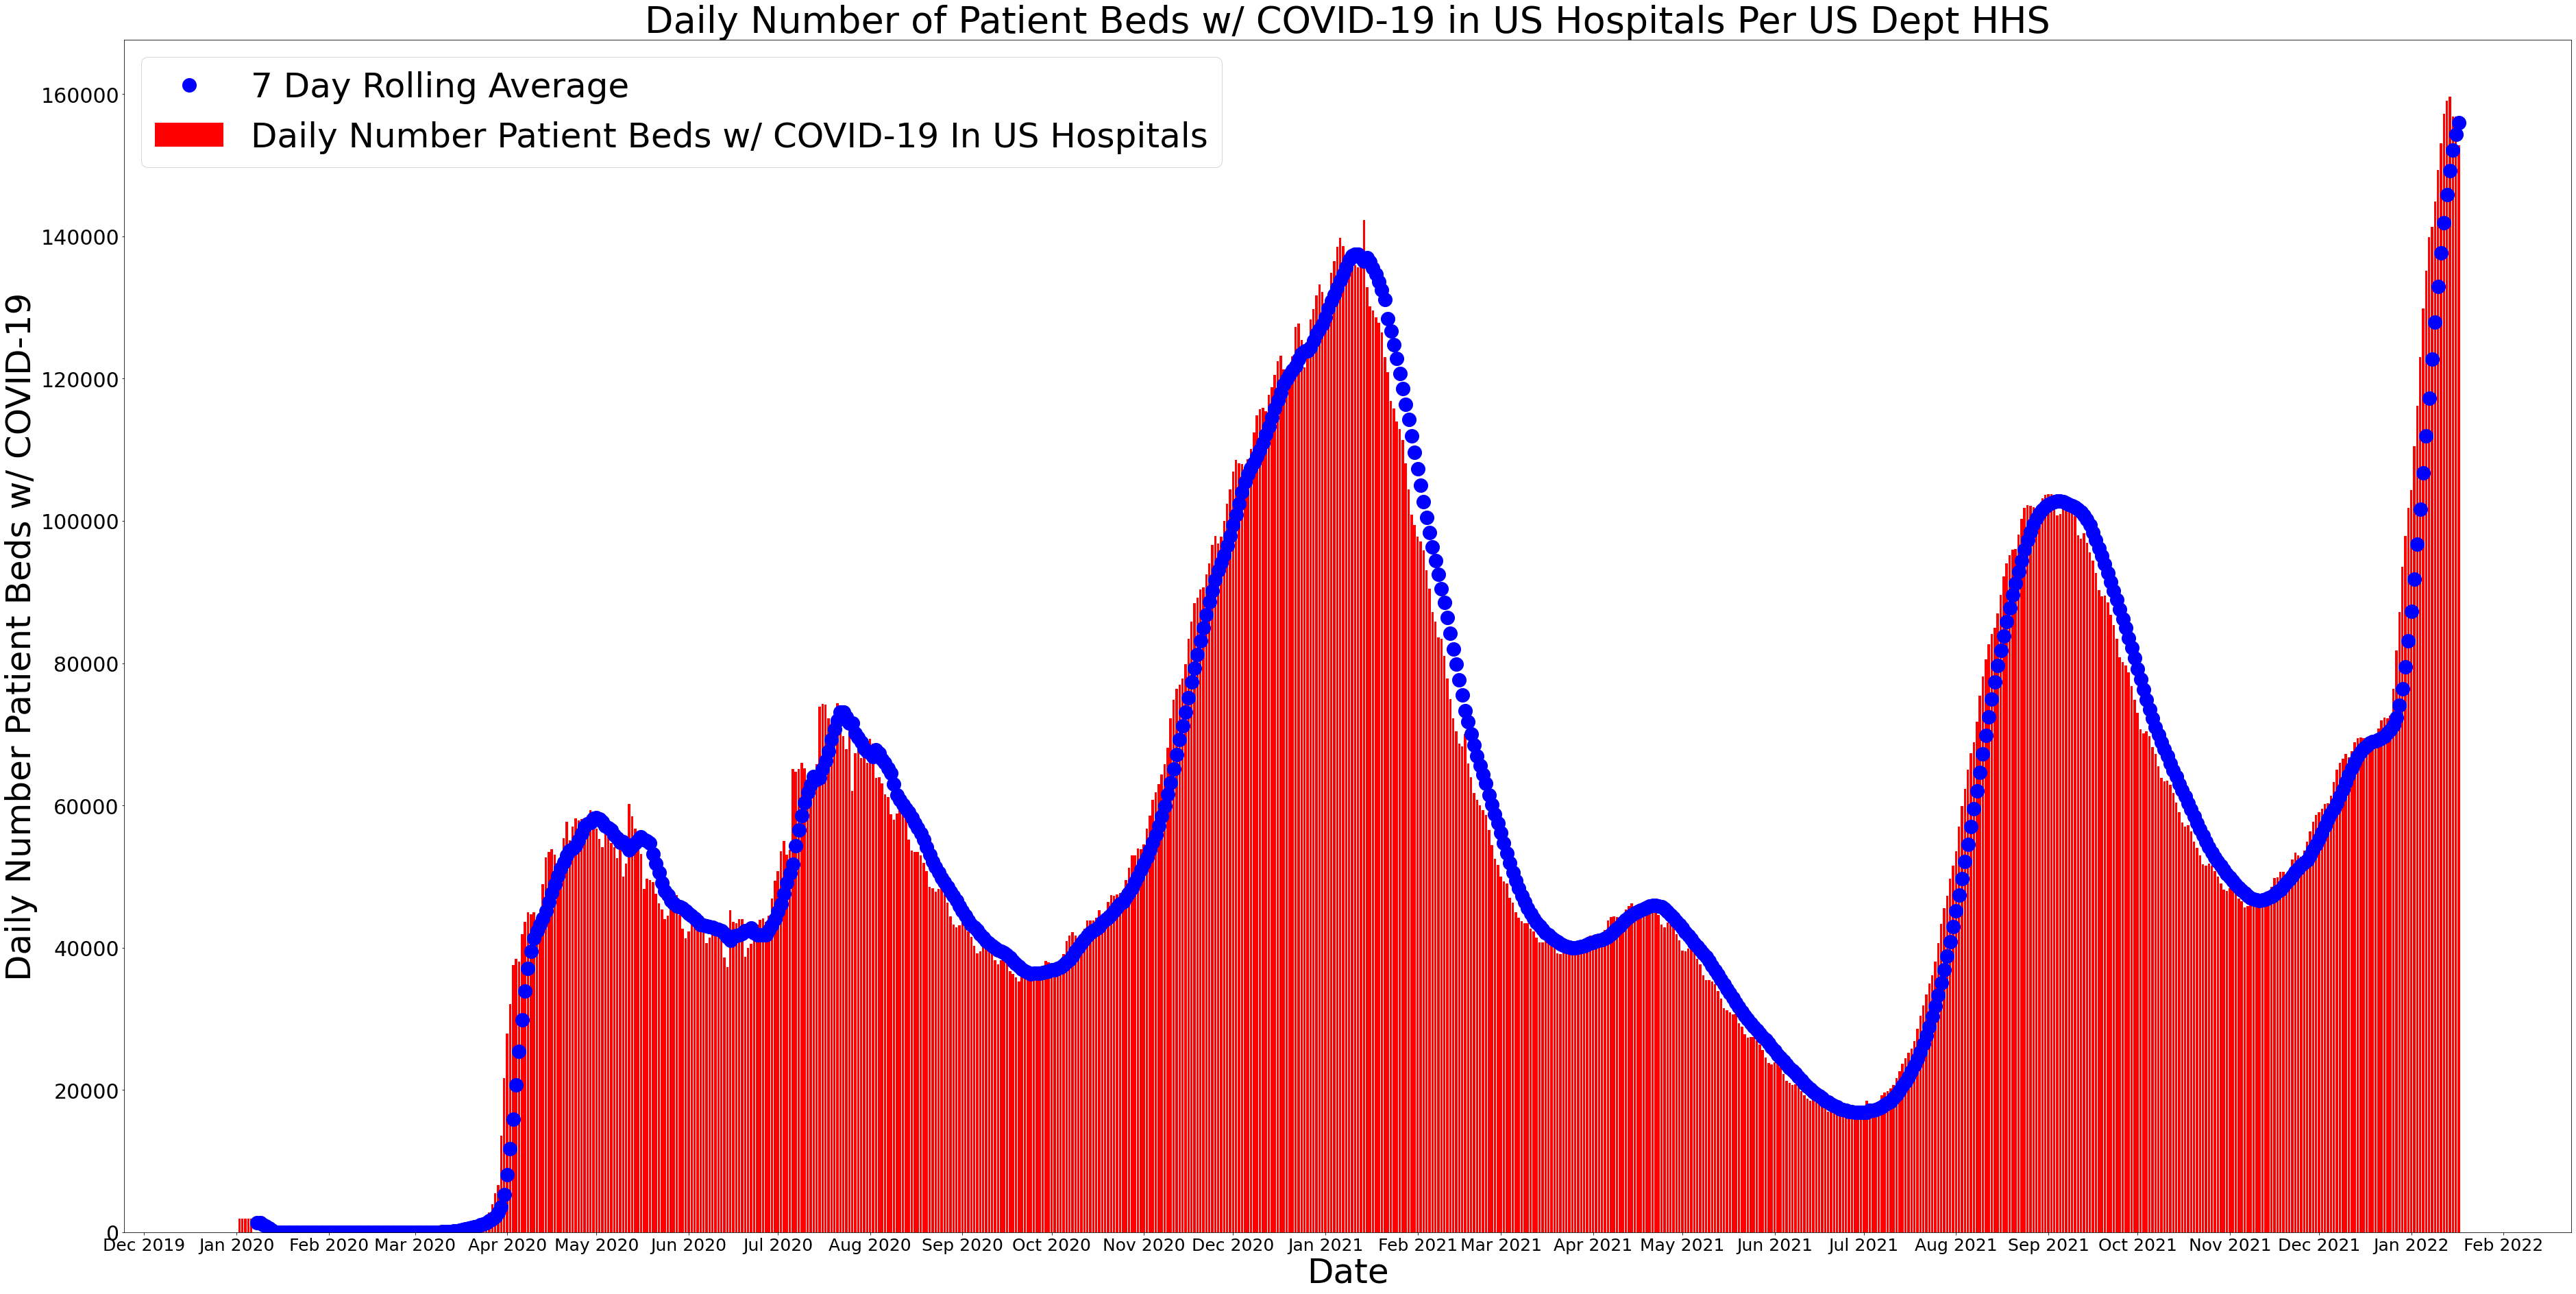

In [25]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(64,32)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=25)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily Number of Patient Beds w/ COVID-19 in US Hospitals Per US Dept HHS', fontsize = 54)
plt.xlabel('Date',color='black', fontsize = 50)
plt.ylabel('Daily Number Patient Beds w/ COVID-19',color='black', fontsize = 50)
plt.bar(ccc.index, ccc.inpatient_beds_used_covid, color = 'red')
plt.plot(ccc_rolling.inpatient_beds_used_covid, 'bo',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily Number Patient Beds w/ COVID-19 In US Hospitals'], fontsize = 50)
fig.savefig('HHS_inpaitent_beds_covid.png')

In [26]:
ccc.tail()

,inpatient_beds_used_covid
date,
2022-01-13,159050.0
2022-01-14,159635.0
2022-01-15,156867.0
2022-01-16,156833.0
2022-01-17,152839.0


df_hhs.total_pediatric_patients_hospitalized_confirmed_and_suspected_covid

In [27]:
aaa = []
for x in date_list:
    #print(df_hhs[df_hhs.date == x]['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'].sum()))
df_total_pediatric_patients_hospitalized_confirmed_and_suspected_covid = pd.DataFrame(aaa,columns=['date', 'total_pediatric_patients_hospitalized_confirmed_and_suspected_covid'])

In [28]:
df_total_pediatric_patients_hospitalized_confirmed_and_suspected_covid.tail()

,date,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid
743,2022-01-13,5469.0
744,2022-01-14,5414.0
745,2022-01-15,5196.0
746,2022-01-16,5000.0
747,2022-01-17,4697.0


In [29]:
ccc = df_total_pediatric_patients_hospitalized_confirmed_and_suspected_covid.set_index('date')[-520::]
ccc_rolling = ccc.rolling(7).mean().shift()

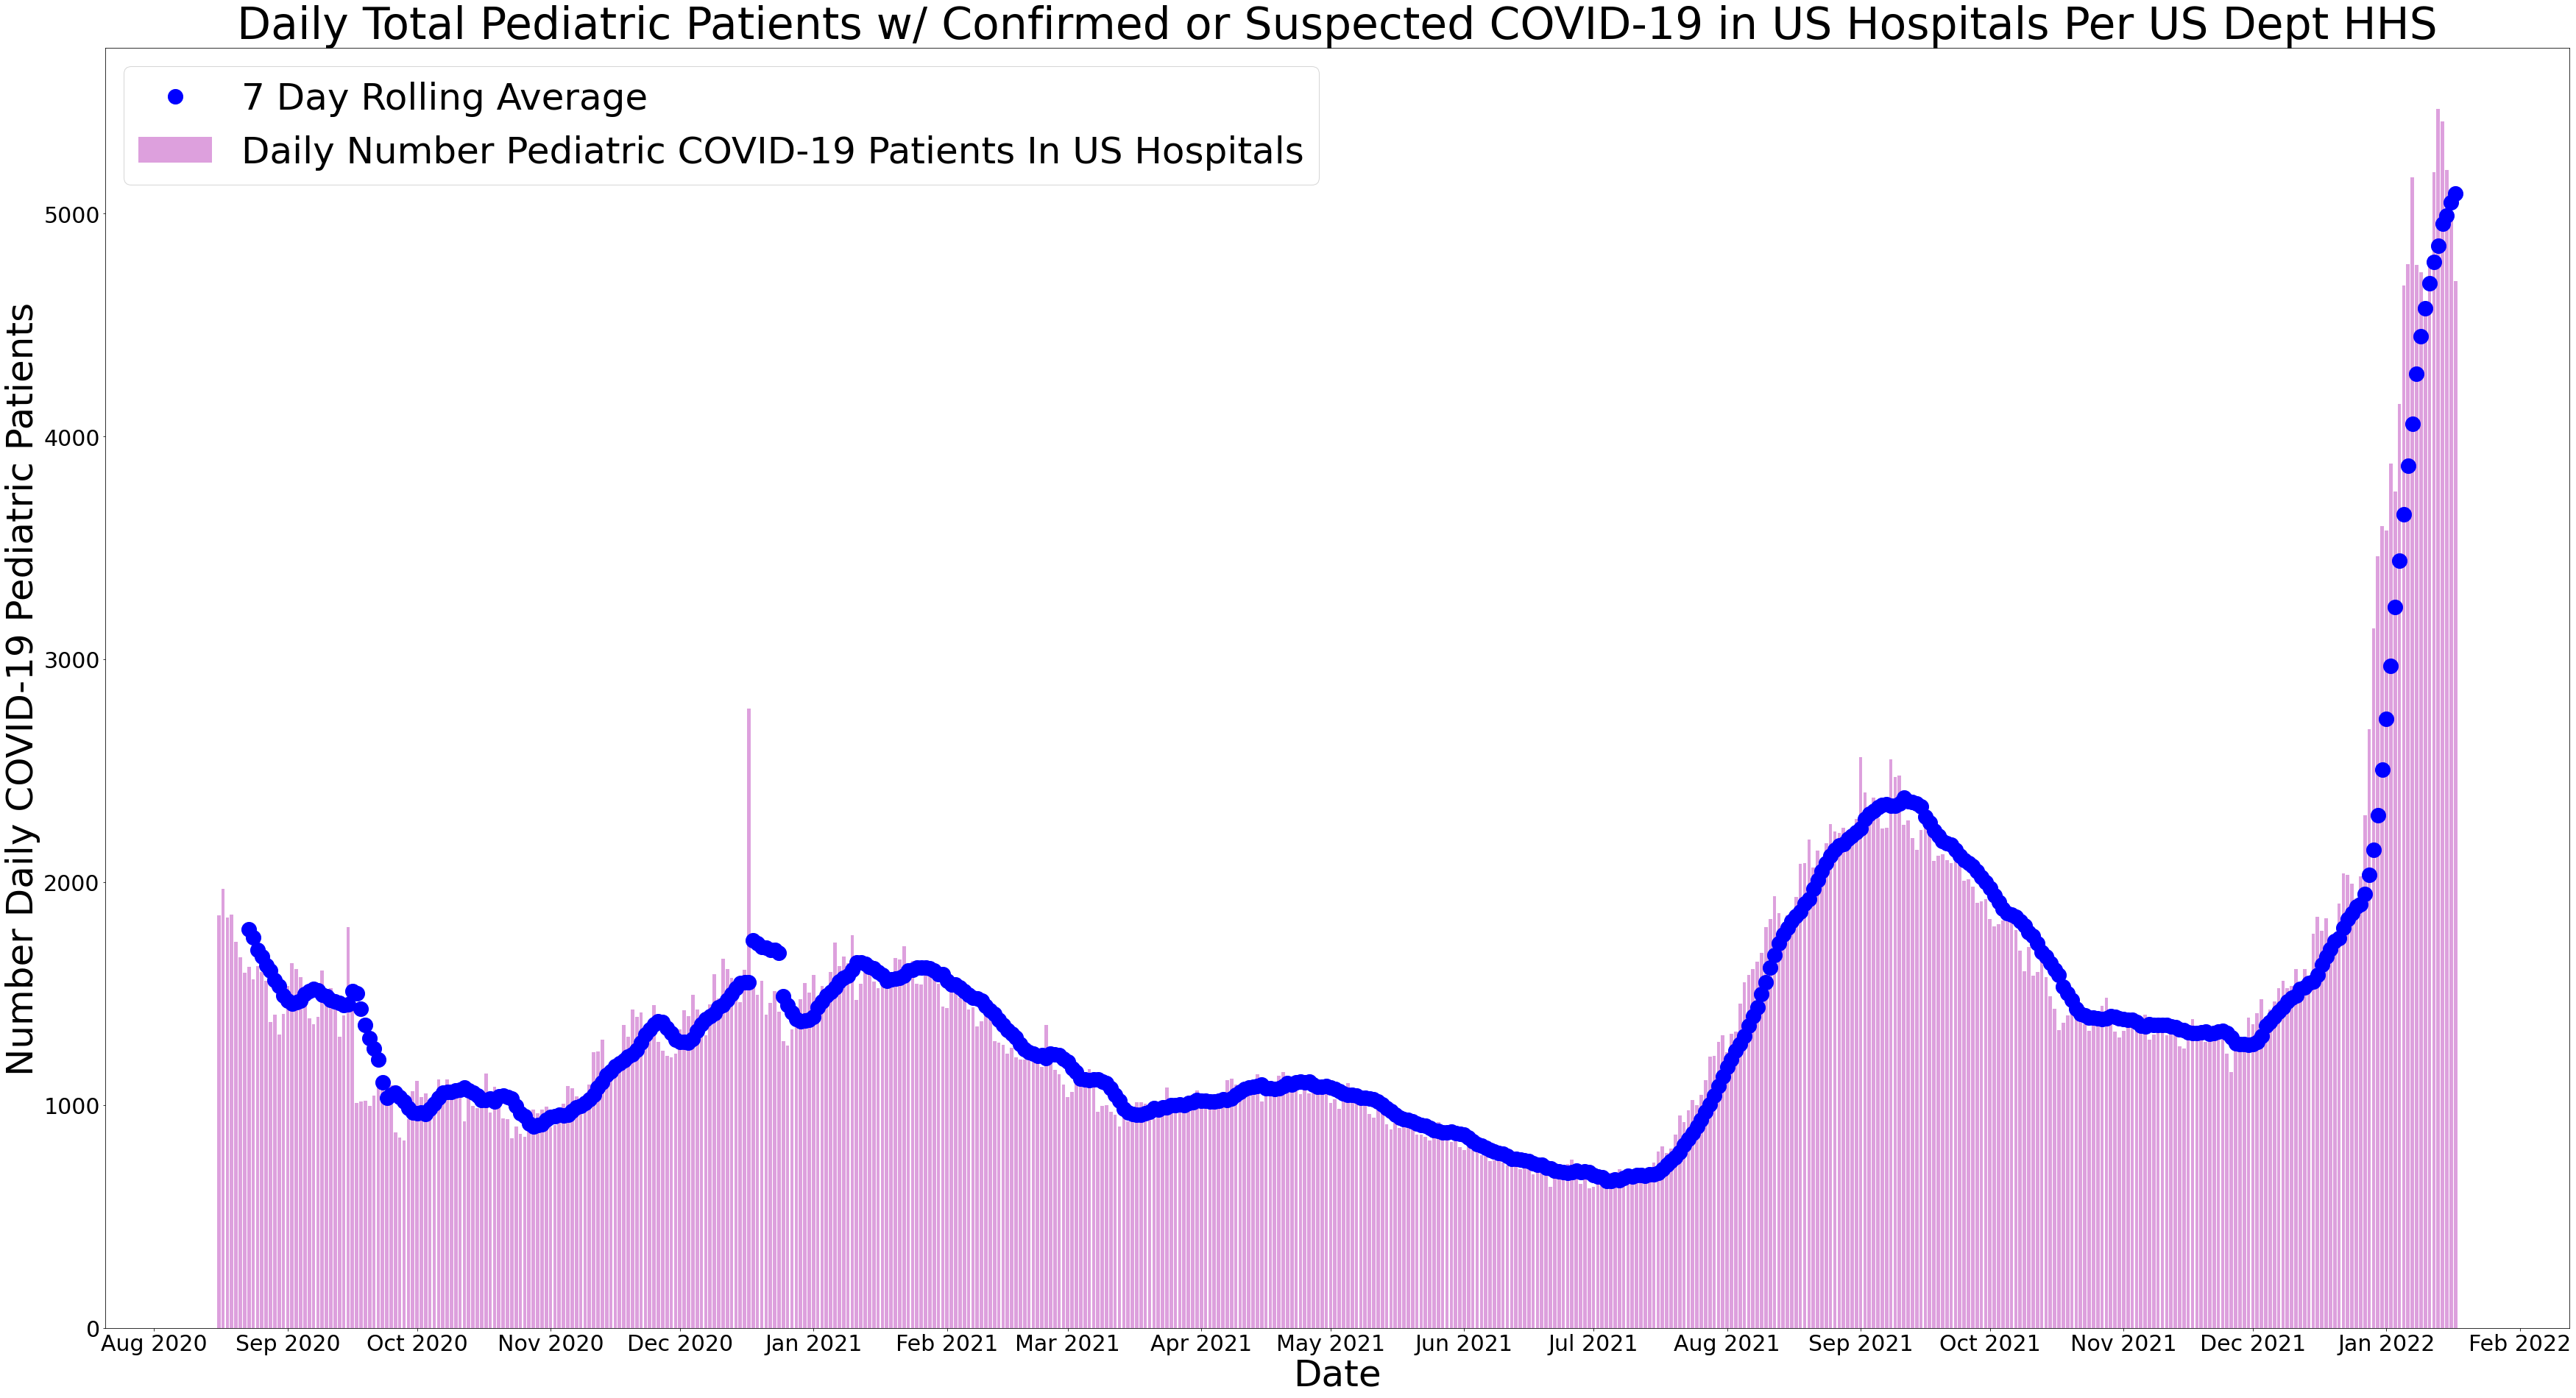

In [30]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(60,32)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
plt.title('Daily Total Pediatric Patients w/ Confirmed or Suspected COVID-19 in US Hospitals Per US Dept HHS', fontsize = 60)
plt.xlabel('Date',color='black', fontsize = 50)
plt.ylabel('Number Daily COVID-19 Pediatric Patients',color='black', fontsize = 50)
plt.bar(ccc.index, ccc.total_pediatric_patients_hospitalized_confirmed_and_suspected_covid, color = 'plum')
plt.plot(ccc_rolling.total_pediatric_patients_hospitalized_confirmed_and_suspected_covid, 'bo',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily Number Pediatric COVID-19 Patients In US Hospitals'], fontsize = 50)
fig.savefig('HHS_total_pediatric.png')

adult_icu_bed_covid_utilization

In [31]:
aaa = []
for x in date_list:
    #print(df_hhs[df_hhs.date == x]['adult_icu_bed_covid_utilization'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['adult_icu_bed_covid_utilization'].sum()))
df_adult_icu_bed_covid_utilization = pd.DataFrame(aaa,columns=['date', 'adult_icu_bed_covid_utilization'])

staffed_icu_adult_patients_confirmed_and_suspected_covid 

In [32]:
aaa = []
for x in date_list:
    #print(df_hhs[df_hhs.date == x]['staffed_icu_adult_patients_confirmed_and_suspected_covid'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['staffed_icu_adult_patients_confirmed_and_suspected_covid'].sum()))
df_staffed_icu_adult_patients_confirmed_and_suspected_covid = pd.DataFrame(aaa,columns=['date', 'staffed_icu_adult_patients_confirmed_and_suspected_covid'])

In [33]:
ccc = df_staffed_icu_adult_patients_confirmed_and_suspected_covid.set_index('date')[-500::]
ccc_rolling = ccc.rolling(7).mean().shift()
ccc.tail()

,staffed_icu_adult_patients_confirmed_and_suspected_covid
date,
2022-01-13,25832.0
2022-01-14,25955.0
2022-01-15,25832.0
2022-01-16,25888.0
2022-01-17,25580.0


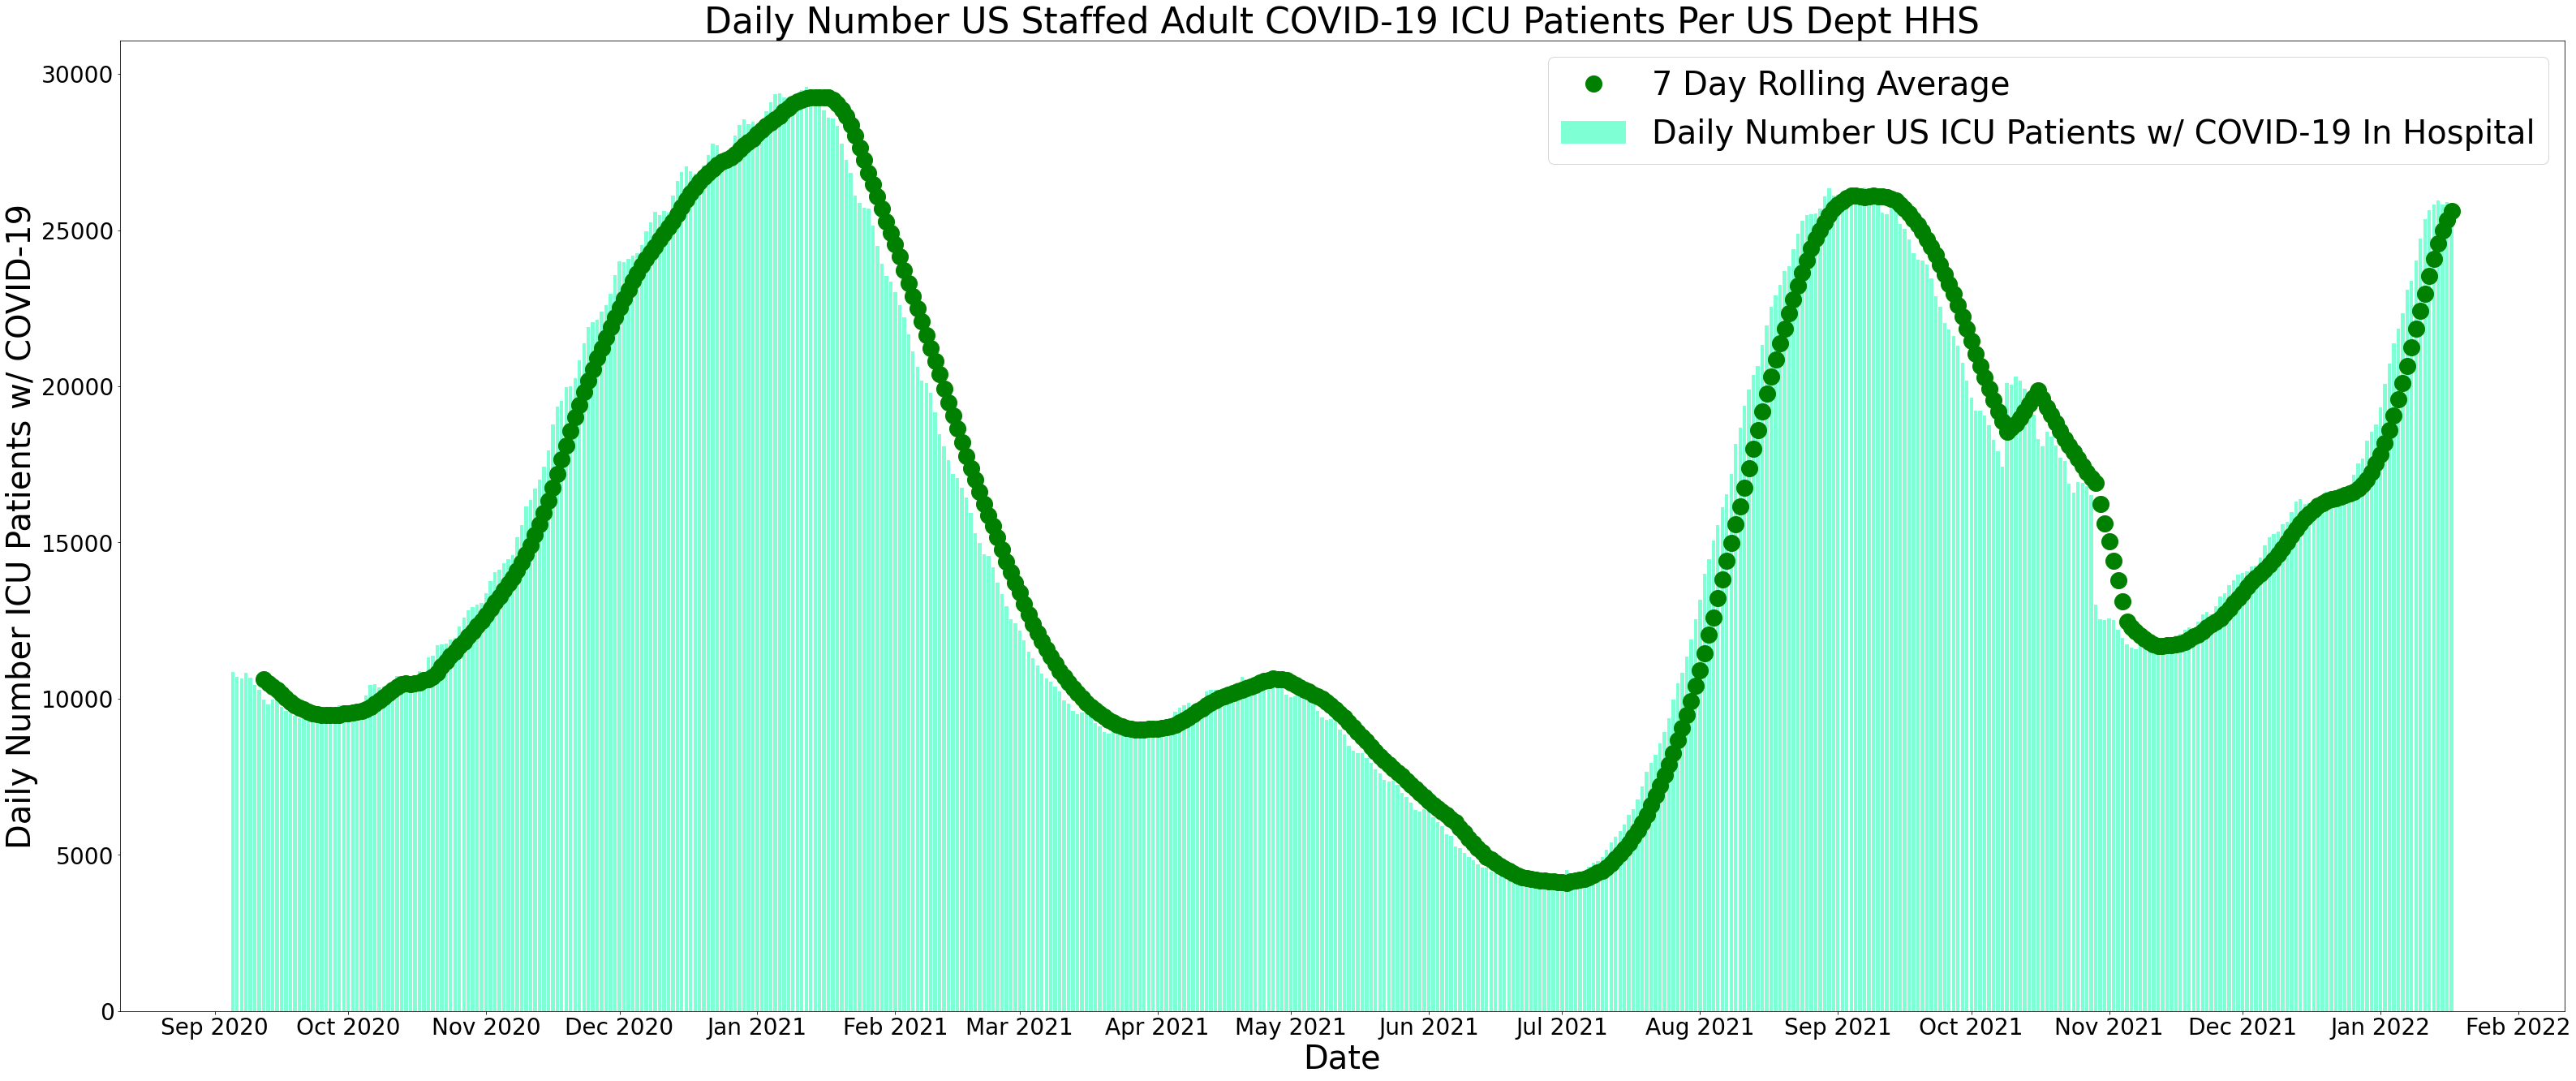

In [34]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily Number US Staffed Adult COVID-19 ICU Patients Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Daily Number ICU Patients w/ COVID-19',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.staffed_icu_adult_patients_confirmed_and_suspected_covid, color = 'aquamarine')
plt.plot(ccc_rolling.staffed_icu_adult_patients_confirmed_and_suspected_covid, 'go',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily Number US ICU Patients w/ COVID-19 In Hospital'], fontsize = 40)
#plt.legend(['7 Day Rolling Average','Daily Reported Deaths'])
fig.savefig('HHS_staffed_adult_ICU.png')

previous_day_admission_adult_covid_confirmed 

In [35]:
aaa = []
for x in date_list:
    #print(df_hhs[df_hhs.date == x]['previous_day_admission_adult_covid_confirmed'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['previous_day_admission_adult_covid_confirmed'].sum()))
df_previous_day_admission_adult_covid_confirmed = pd.DataFrame(aaa,columns=['date', 'previous_day_admission_adult_covid_confirmed'])

In [36]:
ccc = df_previous_day_admission_adult_covid_confirmed.set_index('date')[-500::]
ccc_rolling = ccc.rolling(7).mean().shift()
ccc.tail()

,previous_day_admission_adult_covid_confirmed
date,
2022-01-13,22200.0
2022-01-14,22476.0
2022-01-15,21682.0
2022-01-16,19426.0
2022-01-17,18853.0


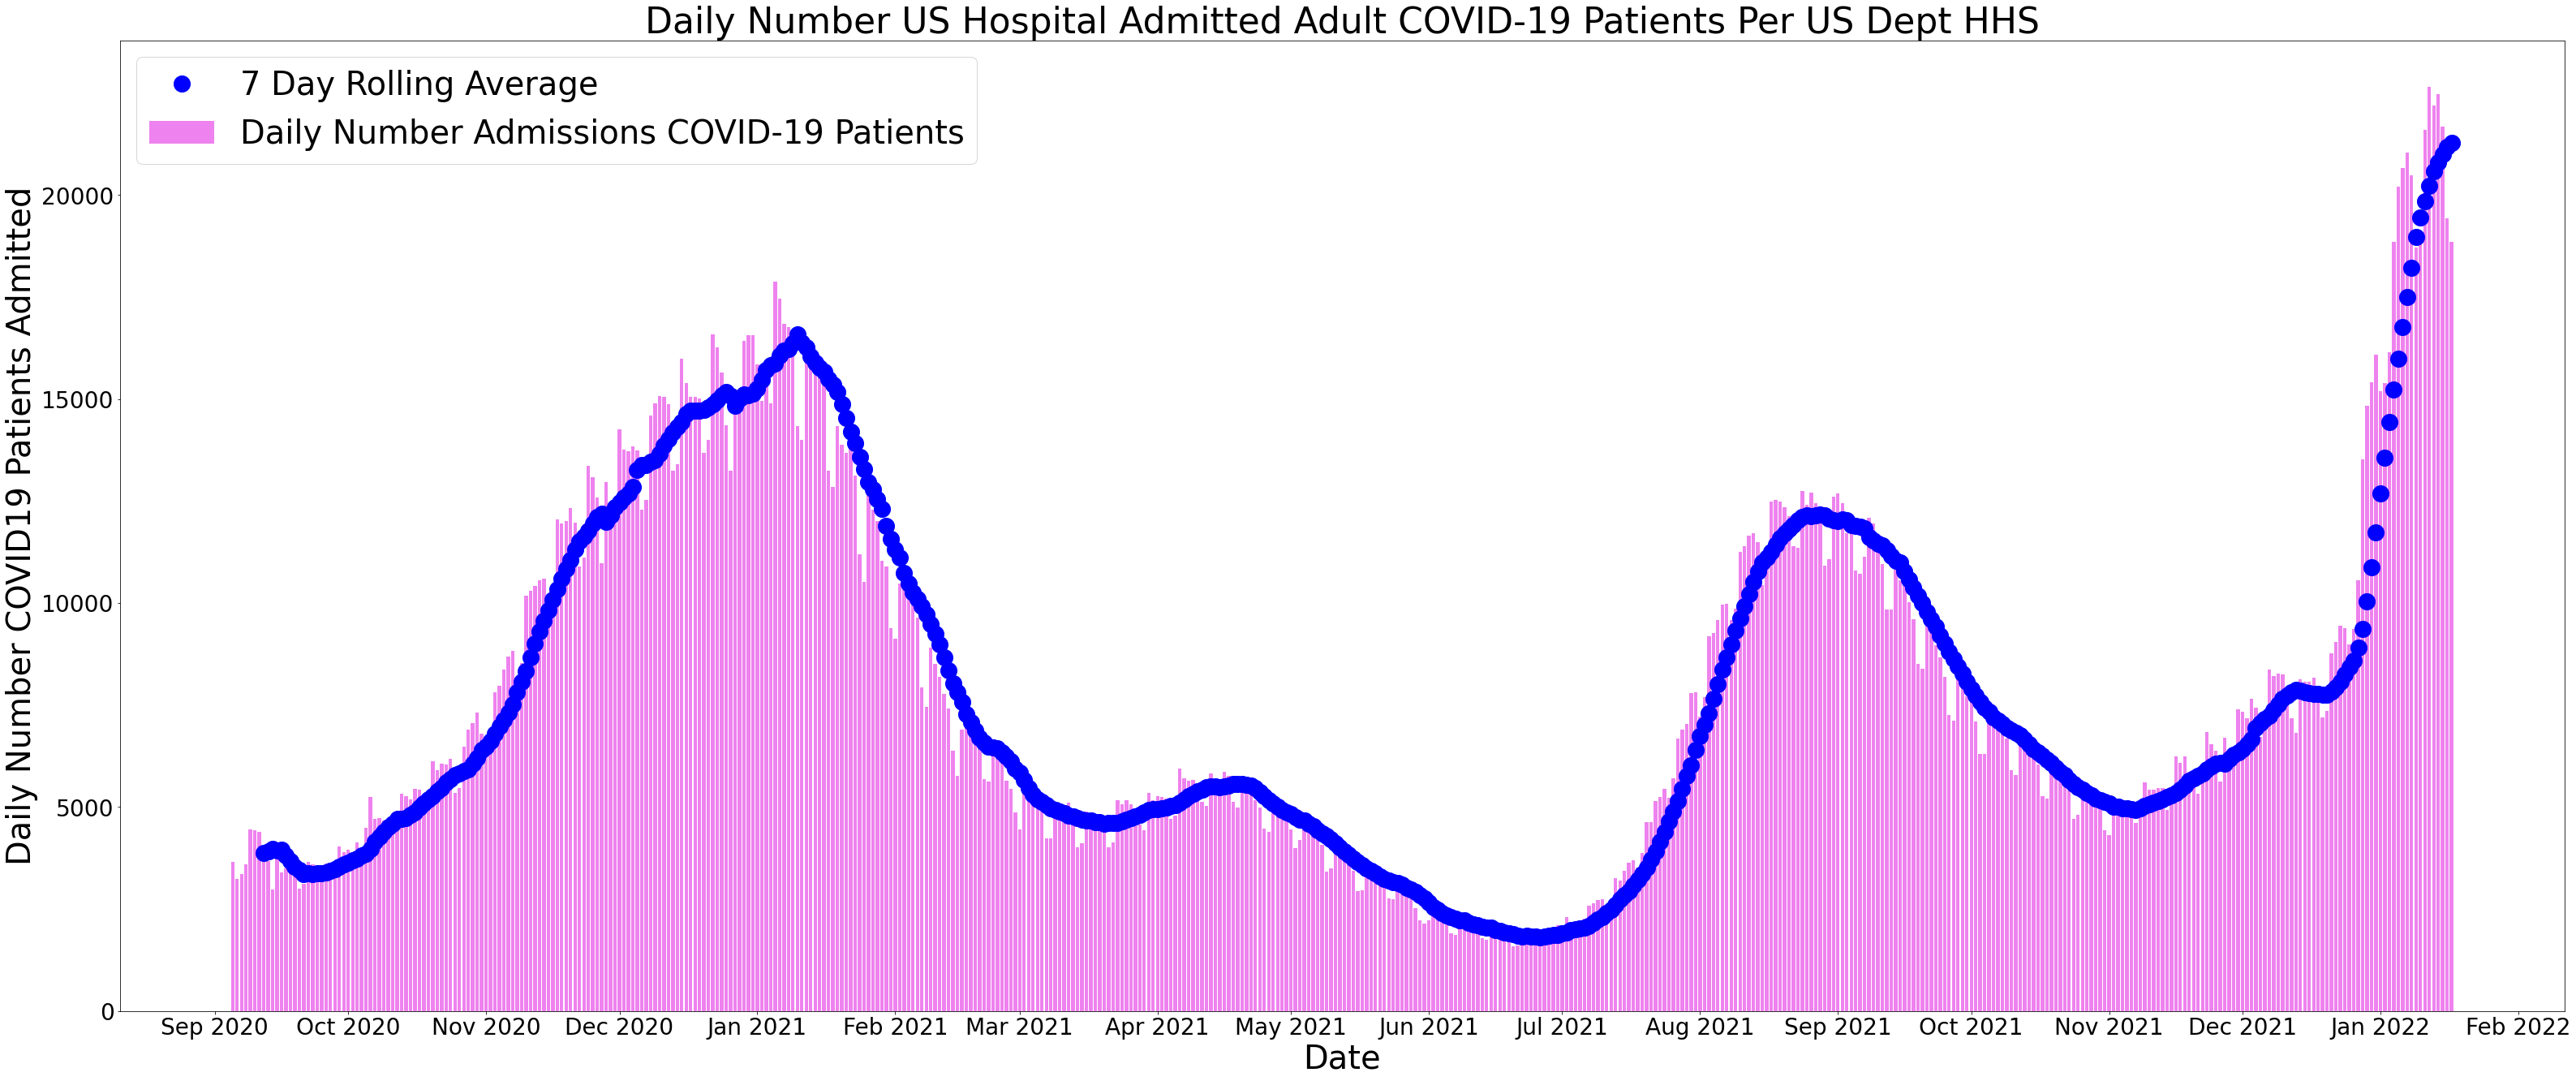

In [37]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily Number US Hospital Admitted Adult COVID-19 Patients Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Daily Number COVID19 Patients Admitted',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.previous_day_admission_adult_covid_confirmed, color = 'violet')
plt.plot(ccc_rolling.previous_day_admission_adult_covid_confirmed, 'bo',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily Number Admissions COVID-19 Patients'], fontsize = 40)
fig.savefig('previous_day_admission_adult_covid_confirmed.png')

previous_day_admission_pediatric_covid_confirmed   

In [38]:
aaa = []
for x in date_list:
    #print(df_hhs[df_hhs.date == x]['previous_day_admission_pediatric_covid_confirmed'].sum())
    aaa.append((x, df_hhs[df_hhs.date == x]['previous_day_admission_pediatric_covid_confirmed'].sum()))
df_previous_day_admission_pediatric_covid_confirmed = pd.DataFrame(aaa,columns=['date', 'previous_day_admission_pediatric_covid_confirmed'])

In [39]:
ccc = df_previous_day_admission_pediatric_covid_confirmed.set_index('date')[-500::]
ccc_rolling = ccc.rolling(7).mean().shift()

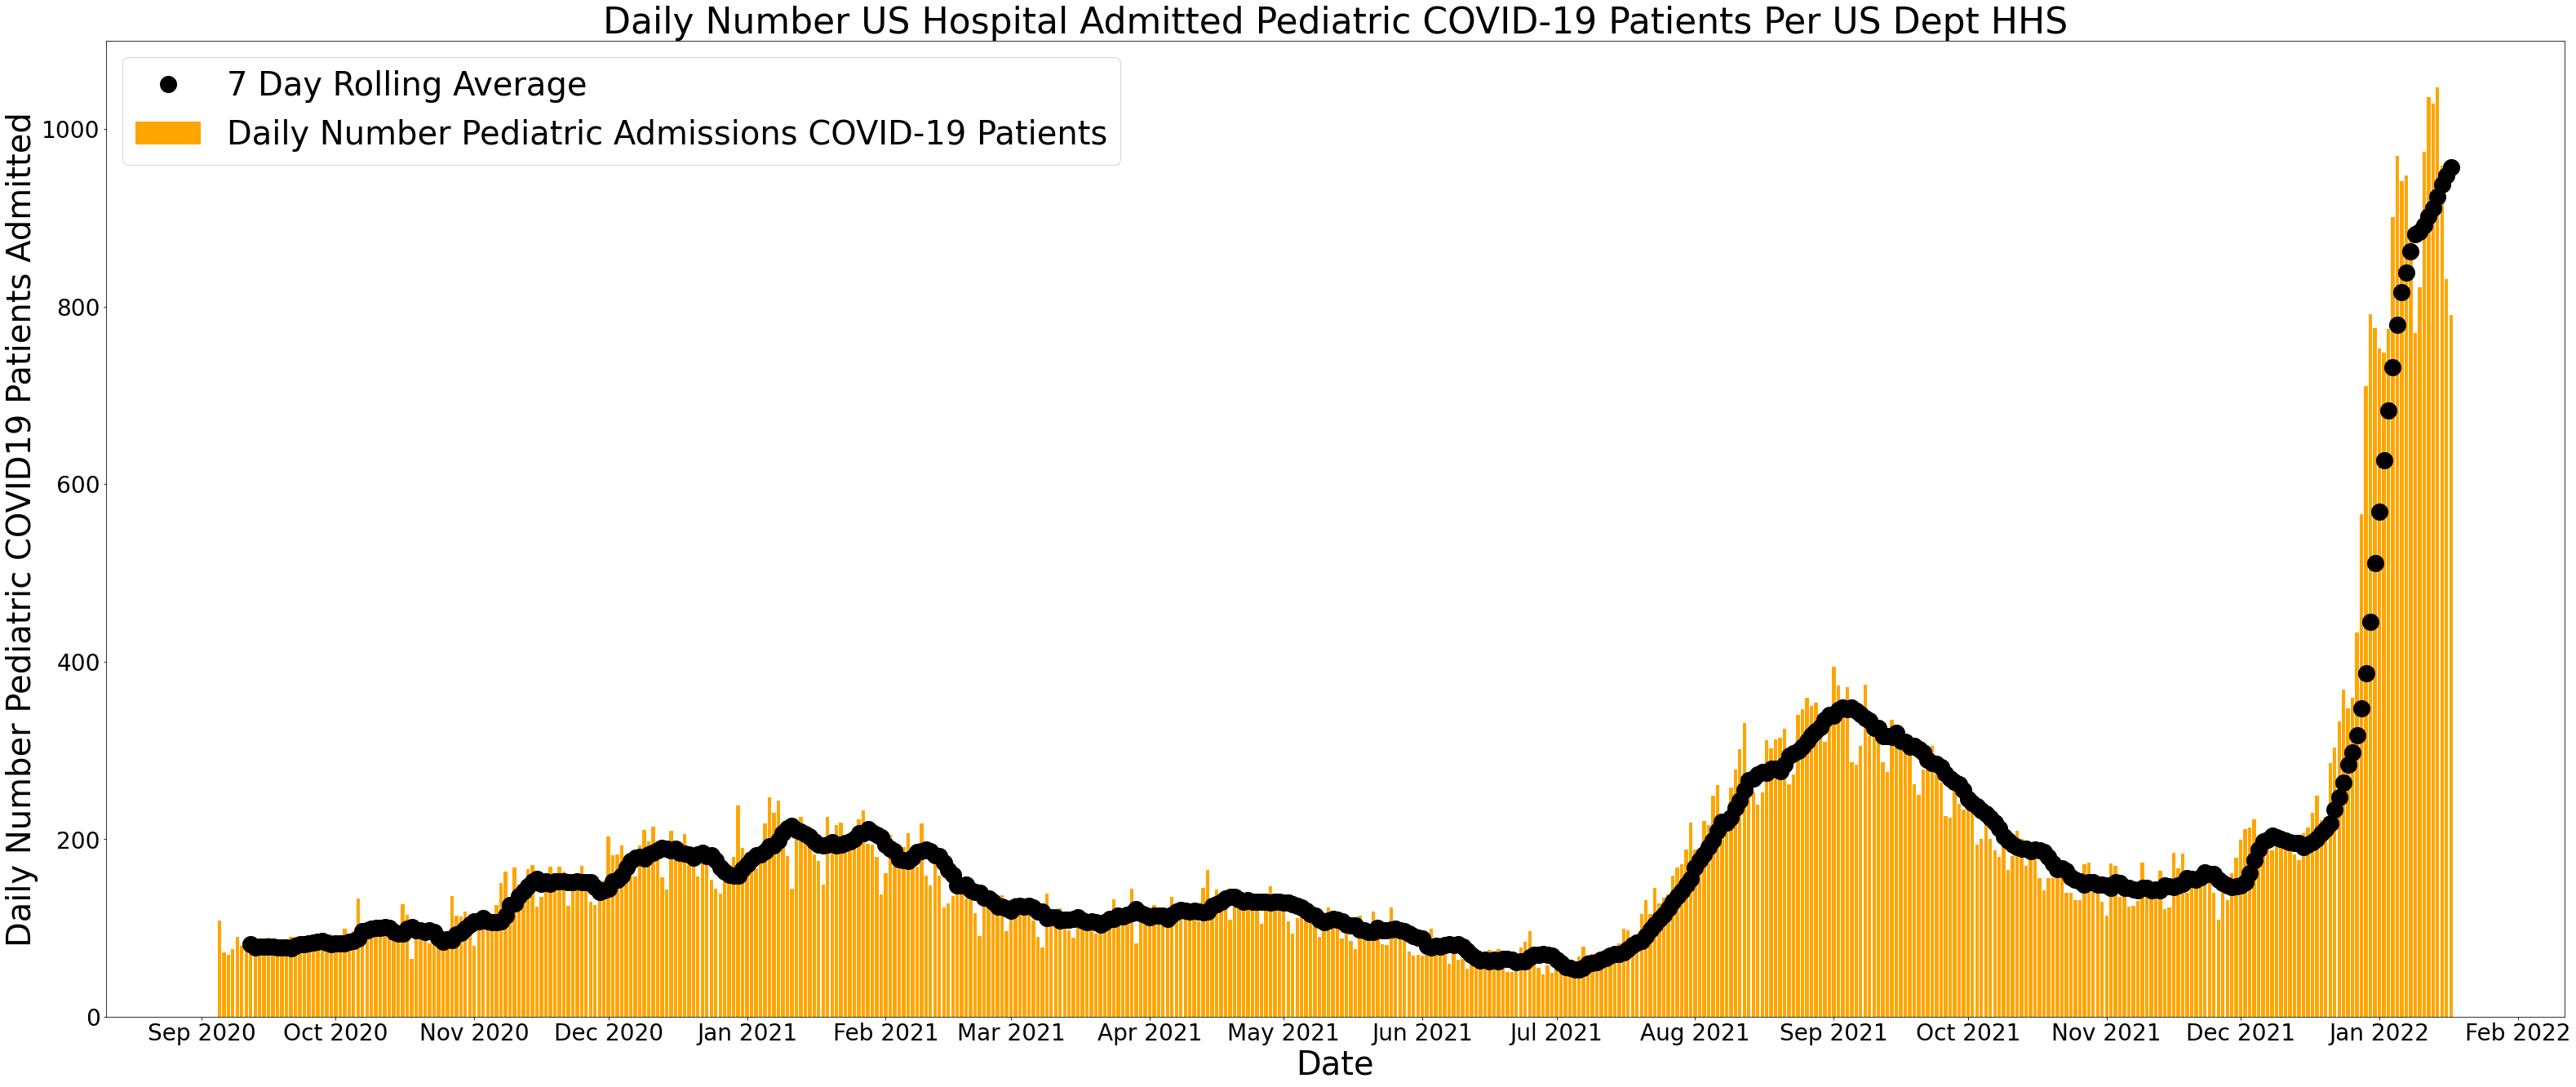

In [40]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(54,22)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=28)
#ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Daily Number US Hospital Admitted Pediatric COVID-19 Patients Per US Dept HHS', fontsize = 44)
plt.xlabel('Date',color='black', fontsize = 40)
plt.ylabel('Daily Number Pediatric COVID19 Patients Admitted',color='black', fontsize = 40)
plt.bar(ccc.index, ccc.previous_day_admission_pediatric_covid_confirmed, color = 'orange')
plt.plot(ccc_rolling.previous_day_admission_pediatric_covid_confirmed, 'ko',markersize = 20)
plt.legend(['7 Day Rolling Average','Daily Number Pediatric Admissions COVID-19 Patients'], fontsize = 40)
fig.savefig('hhs_previous_day_admission_pediatric_covid_confirmed.png')

In [41]:
ccc.tail()

,previous_day_admission_pediatric_covid_confirmed
date,
2022-01-13,1028.0
2022-01-14,1047.0
2022-01-15,959.0
2022-01-16,831.0
2022-01-17,790.0
